In [1]:
import pandas as pd
import numpy as np
import os
import requests
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
# Get the current working directory
#curent_directory = os.getcwd()
#print("The current directory is : ", curent_directory)
# List all files and folders in the current directory
#entries = os.listdir(curent_directory)

#for a in entries :
   # print(a) 
    #print()
# Returns ['my_data, 'airbnb_data.csv'] 

In [5]:
file_path = 'Patients-Data-Heart-Disease-Prediction.xlsx'  # BE PATIENT, IT'S A LARGE FILE, IT TAKES MUCH TIME LOADING
df = pd.read_excel(file_path)

In [13]:
df.head()

,PatientID,State,Sex,GeneralHealth,AgeCategory,HeightInMeters,WeightInKilograms,BMI,HadHeartAttack,HadAngina,...,ECigaretteUsage,ChestScan,RaceEthnicityCategory,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,1,Alabama,Female,Fair,Age 75 to 79,1.63,84.820000,32.099998,0,1,...,Never used e-cigarettes in my entire life,1,"White only, Non-Hispanic",0,0,0,1,"No, did not receive any tetanus shot in the pa...",0,1
1,2,Alabama,Female,Very good,Age 65 to 69,1.60,71.669998,27.990000,0,0,...,Never used e-cigarettes in my entire life,0,"White only, Non-Hispanic",0,0,1,1,"Yes, received Tdap",0,0
2,3,Alabama,Male,Excellent,Age 60 to 64,1.78,71.209999,22.530001,0,0,...,Never used e-cigarettes in my entire life,0,"White only, Non-Hispanic",1,0,0,0,"Yes, received tetanus shot but not sure what type",0,0
3,4,Alabama,Male,Very good,Age 70 to 74,1.78,95.250000,30.129999,0,0,...,Never used e-cigarettes in my entire life,0,"White only, Non-Hispanic",0,0,1,1,"Yes, received tetanus shot but not sure what type",0,0
4,5,Alabama,Female,Good,Age 50 to 54,1.68,78.019997,27.760000,0,0,...,Never used e-cigarettes in my entire life,1,"Black only, Non-Hispanic",0,0,1,0,"No, did not receive any tetanus shot in the pa...",0,0


In [5]:
df.shape

(237630, 35)

In [7]:
df.columns

Index(['PatientID', 'State', 'Sex', 'GeneralHealth', 'AgeCategory',
       'HeightInMeters', 'WeightInKilograms', 'BMI', 'HadHeartAttack',
       'HadAngina', 'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD',
       'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis',
       'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
       'DifficultyConcentrating', 'DifficultyWalking',
       'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus',
       'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory',
       'AlcoholDrinkers', 'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver',
       'TetanusLast10Tdap', 'HighRiskLastYear', 'CovidPos'],
      dtype='object')

In [25]:
(df[19:20]).to_dict(orient='records')

[{'PatientID': 20,
  'State': 'Alabama',
  'Sex': 'Male',
  'GeneralHealth': 'Good',
  'AgeCategory': 'Age 40 to 44',
  'HeightInMeters': 1.70000004768372,
  'WeightInKilograms': 78.0199966430664,
  'BMI': 26.9400005340576,
  'HadHeartAttack': 0,
  'HadAngina': 0,
  'HadStroke': 0,
  'HadAsthma': 0,
  'HadSkinCancer': 0,
  'HadCOPD': 0,
  'HadDepressiveDisorder': 0,
  'HadKidneyDisease': 0,
  'HadArthritis': 1,
  'HadDiabetes': 'No',
  'DeafOrHardOfHearing': 1,
  'BlindOrVisionDifficulty': 0,
  'DifficultyConcentrating': 0,
  'DifficultyWalking': 0,
  'DifficultyDressingBathing': 0,
  'DifficultyErrands': 0,
  'SmokerStatus': 'Former smoker',
  'ECigaretteUsage': 'Never used e-cigarettes in my entire life',
  'ChestScan': 1,
  'RaceEthnicityCategory': 'White only, Non-Hispanic',
  'AlcoholDrinkers': 0,
  'HIVTesting': 0,
  'FluVaxLast12': 0,
  'PneumoVaxEver': 0,
  'TetanusLast10Tdap': 'No, did not receive any tetanus shot in the past 10 years',
  'HighRiskLastYear': 0,
  'CovidPos': 1

In [19]:
# Using lower() + string slicing
# Lowercase first character of String
#res = test_str[0].lower() + test_str[1:]
#df.columns = df.columns.str.lower().str.replace(' ', '_')

#df1 = df.copy()
# Lowercase first character of String
#for a in df1.columns :
#    a = a[0].lower() + a[1:]
#    print(a)
    

In [21]:
#df1.columns

### Preparing the dataset 

**First, we'll normalize the names of the columns:**

In [25]:
# Lowercase first character of String
#for a in df.columns :
#    a = a[0].lower() + a[1:]

In [35]:
df.columns = df.columns.str.lower().str.replace(' ', '_')
categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)

for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(' ', '_')

In [29]:
df.columns

Index(['patientid', 'state', 'sex', 'generalhealth', 'agecategory',
       'heightinmeters', 'weightinkilograms', 'bmi', 'hadheartattack',
       'hadangina', 'hadstroke', 'hadasthma', 'hadskincancer', 'hadcopd',
       'haddepressivedisorder', 'hadkidneydisease', 'hadarthritis',
       'haddiabetes', 'deaforhardofhearing', 'blindorvisiondifficulty',
       'difficultyconcentrating', 'difficultywalking',
       'difficultydressingbathing', 'difficultyerrands', 'smokerstatus',
       'ecigaretteusage', 'chestscan', 'raceethnicitycategory',
       'alcoholdrinkers', 'hivtesting', 'fluvaxlast12', 'pneumovaxever',
       'tetanuslast10tdap', 'highrisklastyear', 'covidpos'],
      dtype='object')

In [31]:
categorical_columns

['state',
 'sex',
 'generalhealth',
 'agecategory',
 'haddiabetes',
 'smokerstatus',
 'ecigaretteusage',
 'raceethnicitycategory',
 'tetanuslast10tdap']

In [33]:
df

,patientid,state,sex,generalhealth,agecategory,heightinmeters,weightinkilograms,bmi,hadheartattack,hadangina,...,ecigaretteusage,chestscan,raceethnicitycategory,alcoholdrinkers,hivtesting,fluvaxlast12,pneumovaxever,tetanuslast10tdap,highrisklastyear,covidpos
0,1,alabama,female,fair,age_75_to_79,1.63,84.820000,32.099998,0,1,...,never_used_e-cigarettes_in_my_entire_life,1,"white_only,_non-hispanic",0,0,0,1,"no,_did_not_receive_any_tetanus_shot_in_the_pa...",0,1
1,2,alabama,female,very_good,age_65_to_69,1.60,71.669998,27.990000,0,0,...,never_used_e-cigarettes_in_my_entire_life,0,"white_only,_non-hispanic",0,0,1,1,"yes,_received_tdap",0,0
2,3,alabama,male,excellent,age_60_to_64,1.78,71.209999,22.530001,0,0,...,never_used_e-cigarettes_in_my_entire_life,0,"white_only,_non-hispanic",1,0,0,0,"yes,_received_tetanus_shot_but_not_sure_what_type",0,0
3,4,alabama,male,very_good,age_70_to_74,1.78,95.250000,30.129999,0,0,...,never_used_e-cigarettes_in_my_entire_life,0,"white_only,_non-hispanic",0,0,1,1,"yes,_received_tetanus_shot_but_not_sure_what_type",0,0
4,5,alabama,female,good,age_50_to_54,1.68,78.019997,27.760000,0,0,...,never_used_e-cigarettes_in_my_entire_life,1,"black_only,_non-hispanic",0,0,1,0,"no,_did_not_receive_any_tetanus_shot_in_the_pa...",0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237625,237626,puerto_rico,female,good,age_60_to_64,1.57,90.720001,36.580002,0,0,...,not_at_all_(right_now),0,hispanic,0,0,1,0,"no,_did_not_receive_any_tetanus_shot_in_the_pa...",0,0
237626,237627,puerto_rico,female,good,age_55_to_59,1.70,72.570000,25.059999,0,1,...,not_at_all_(right_now),0,hispanic,0,1,0,0,"yes,_received_tdap",0,0
237627,237628,puerto_rico,male,fair,age_45_to_49,1.75,70.309998,22.889999,1,1,...,not_at_all_(right_now),1,hispanic,0,1,1,1,"yes,_received_tdap",1,0
237628,237629,puerto_rico,female,very_good,age_25_to_29,1.57,46.720001,18.840000,0,0,...,never_used_e-cigarettes_in_my_entire_life,0,hispanic,0,1,0,0,"no,_did_not_receive_any_tetanus_shot_in_the_pa...",0,1


In [35]:
df.dtypes

patientid                      int64
state                         object
sex                           object
generalhealth                 object
agecategory                   object
heightinmeters               float64
weightinkilograms            float64
bmi                          float64
hadheartattack                 int64
hadangina                      int64
hadstroke                      int64
hadasthma                      int64
hadskincancer                  int64
hadcopd                        int64
haddepressivedisorder          int64
hadkidneydisease               int64
hadarthritis                   int64
haddiabetes                   object
deaforhardofhearing            int64
blindorvisiondifficulty        int64
difficultyconcentrating        int64
difficultywalking              int64
difficultydressingbathing      int64
difficultyerrands              int64
smokerstatus                  object
ecigaretteusage               object
chestscan                      int64
r

In [37]:
df.dtypes[df.dtypes != 'object']

patientid                      int64
heightinmeters               float64
weightinkilograms            float64
bmi                          float64
hadheartattack                 int64
hadangina                      int64
hadstroke                      int64
hadasthma                      int64
hadskincancer                  int64
hadcopd                        int64
haddepressivedisorder          int64
hadkidneydisease               int64
hadarthritis                   int64
deaforhardofhearing            int64
blindorvisiondifficulty        int64
difficultyconcentrating        int64
difficultywalking              int64
difficultydressingbathing      int64
difficultyerrands              int64
chestscan                      int64
alcoholdrinkers                int64
hivtesting                     int64
fluvaxlast12                   int64
pneumovaxever                  int64
highrisklastyear               int64
covidpos                       int64
dtype: object

In [39]:
df.isnull().sum()

patientid                    0
state                        0
sex                          0
generalhealth                0
agecategory                  0
heightinmeters               0
weightinkilograms            0
bmi                          0
hadheartattack               0
hadangina                    0
hadstroke                    0
hadasthma                    0
hadskincancer                0
hadcopd                      0
haddepressivedisorder        0
hadkidneydisease             0
hadarthritis                 0
haddiabetes                  0
deaforhardofhearing          0
blindorvisiondifficulty      0
difficultyconcentrating      0
difficultywalking            0
difficultydressingbathing    0
difficultyerrands            0
smokerstatus                 0
ecigaretteusage              0
chestscan                    0
raceethnicitycategory        0
alcoholdrinkers              0
hivtesting                   0
fluvaxlast12                 0
pneumovaxever                0
tetanusl

In [41]:
df.hadheartattack

0         0
1         0
2         0
3         0
4         0
         ..
237625    0
237626    0
237627    1
237628    0
237629    0
Name: hadheartattack, Length: 237630, dtype: int64

In [45]:
df.hadheartattack.max()

1

In [43]:
df.hadheartattack.min()

0

In [14]:
import sklearn

In [16]:
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The scikit-learn version is 1.4.2.


## 3.3 Setting up the validation framework

* Perform the train/validation/test split with Scikit-Learn

In [10]:
from sklearn.model_selection import train_test_split

In [37]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [31]:
len(df_train), len(df_val), len(df_test)

(142578, 47526, 47526)

In [39]:
df_test

,patientid,state,sex,generalhealth,agecategory,heightinmeters,weightinkilograms,bmi,hadheartattack,hadangina,...,ecigaretteusage,chestscan,raceethnicitycategory,alcoholdrinkers,hivtesting,fluvaxlast12,pneumovaxever,tetanuslast10tdap,highrisklastyear,covidpos
235568,235569,puerto_rico,female,fair,age_55_to_59,1.63,95.250000,36.049999,0,1,...,not_at_all_(right_now),1,hispanic,1,1,0,1,"yes,_received_tetanus_shot_but_not_sure_what_type",0,1
67428,67429,kansas,male,very_good,age_18_to_24,1.88,83.910004,23.750000,0,0,...,not_at_all_(right_now),0,"white_only,_non-hispanic",1,0,0,0,"yes,_received_tetanus_shot_but_not_sure_what_type",0,0
6792,6793,arizona,male,poor,age_60_to_64,1.68,77.110001,27.440001,0,0,...,never_used_e-cigarettes_in_my_entire_life,1,hispanic,0,1,1,1,"yes,_received_tetanus_shot,_but_not_tdap",0,1
183948,183949,tennessee,male,fair,age_75_to_79,2.03,133.809998,32.410000,0,0,...,never_used_e-cigarettes_in_my_entire_life,1,"white_only,_non-hispanic",1,0,1,1,"yes,_received_tetanus_shot_but_not_sure_what_type",0,0
182784,182785,texas,male,poor,age_60_to_64,1.73,62.599998,20.980000,0,0,...,never_used_e-cigarettes_in_my_entire_life,0,"white_only,_non-hispanic",0,0,1,0,"yes,_received_tdap",0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57058,57059,indiana,male,excellent,age_65_to_69,1.80,88.449997,27.200001,0,0,...,never_used_e-cigarettes_in_my_entire_life,1,"white_only,_non-hispanic",1,0,1,1,"no,_did_not_receive_any_tetanus_shot_in_the_pa...",0,0
211848,211849,washington,female,good,age_80_or_older,1.60,53.070000,20.730000,0,0,...,never_used_e-cigarettes_in_my_entire_life,0,"white_only,_non-hispanic",1,0,1,1,"yes,_received_tdap",0,0
68565,68566,kansas,female,good,age_70_to_74,1.55,102.059998,42.509998,0,1,...,never_used_e-cigarettes_in_my_entire_life,0,"multiracial,_non-hispanic",0,0,1,1,"yes,_received_tetanus_shot,_but_not_tdap",0,1
56300,56301,indiana,male,good,age_80_or_older,1.78,90.720001,28.700001,0,0,...,never_used_e-cigarettes_in_my_entire_life,1,"white_only,_non-hispanic",0,0,1,1,"yes,_received_tdap",0,0


In [41]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [43]:
y_train = df_train.hadheartattack.values
y_val = df_val.hadheartattack.values
y_test = df_test.hadheartattack.values

In [45]:
y_train, y_val, y_test

(array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int64))

In [47]:
y_test

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [60]:
len(y_train), len(y_val), len(y_test)

(142578, 47526, 47526)

In [62]:
del df_train['hadheartattack']
del df_val['hadheartattack']
del df_test['hadheartattack']

## 3.4 EDA

* Check missing values
* Look at the target variable (hadheartattack)
* Look at numerical and categorical variables

In [65]:
df_full_train = df_full_train.reset_index(drop=True)

In [67]:
df_full_train.isnull().sum()

patientid                    0
state                        0
sex                          0
generalhealth                0
agecategory                  0
heightinmeters               0
weightinkilograms            0
bmi                          0
hadheartattack               0
hadangina                    0
hadstroke                    0
hadasthma                    0
hadskincancer                0
hadcopd                      0
haddepressivedisorder        0
hadkidneydisease             0
hadarthritis                 0
haddiabetes                  0
deaforhardofhearing          0
blindorvisiondifficulty      0
difficultyconcentrating      0
difficultywalking            0
difficultydressingbathing    0
difficultyerrands            0
smokerstatus                 0
ecigaretteusage              0
chestscan                    0
raceethnicitycategory        0
alcoholdrinkers              0
hivtesting                   0
fluvaxlast12                 0
pneumovaxever                0
tetanusl

## Check the distribution of hadheartattack ##

In [70]:
df_full_train.hadheartattack.value_counts() # Only count values

hadheartattack
0    179511
1     10593
Name: count, dtype: int64

In [72]:
df_full_train.hadheartattack.value_counts(normalize=True)

hadheartattack
0    0.944278
1    0.055722
Name: proportion, dtype: float64

In [74]:
global_hadheartattack_rate = df_full_train.hadheartattack.mean()
global_hadheartattack_rate

0.05572213104406009

In [76]:
round(global_hadheartattack_rate, 2)

0.06

<Axes: xlabel='hadheartattack', ylabel='Count'>

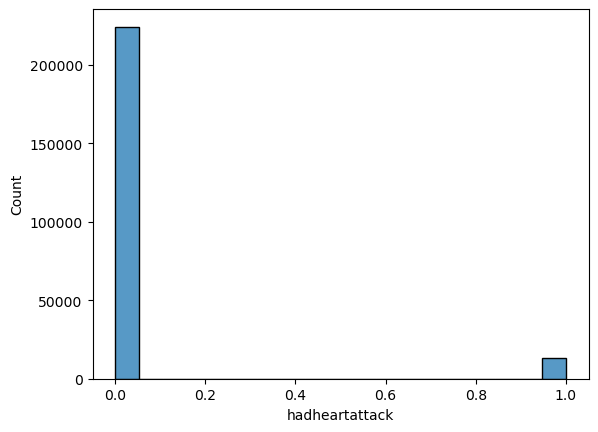

In [78]:
sns.histplot(df.hadheartattack)

### Check the distribution  of other variables ###

In [81]:
df_full_train.dtypes

patientid                      int64
state                         object
sex                           object
generalhealth                 object
agecategory                   object
heightinmeters               float64
weightinkilograms            float64
bmi                          float64
hadheartattack                 int64
hadangina                      int64
hadstroke                      int64
hadasthma                      int64
hadskincancer                  int64
hadcopd                        int64
haddepressivedisorder          int64
hadkidneydisease               int64
hadarthritis                   int64
haddiabetes                   object
deaforhardofhearing            int64
blindorvisiondifficulty        int64
difficultyconcentrating        int64
difficultywalking              int64
difficultydressingbathing      int64
difficultyerrands              int64
smokerstatus                  object
ecigaretteusage               object
chestscan                      int64
r

In [83]:
df_full_train.dtypes[df_full_train.dtypes != "object"]

patientid                      int64
heightinmeters               float64
weightinkilograms            float64
bmi                          float64
hadheartattack                 int64
hadangina                      int64
hadstroke                      int64
hadasthma                      int64
hadskincancer                  int64
hadcopd                        int64
haddepressivedisorder          int64
hadkidneydisease               int64
hadarthritis                   int64
deaforhardofhearing            int64
blindorvisiondifficulty        int64
difficultyconcentrating        int64
difficultywalking              int64
difficultydressingbathing      int64
difficultyerrands              int64
chestscan                      int64
alcoholdrinkers                int64
hivtesting                     int64
fluvaxlast12                   int64
pneumovaxever                  int64
highrisklastyear               int64
covidpos                       int64
dtype: object

In [85]:
numerical = df_full_train.dtypes[df_full_train.dtypes != "object"]
numerical = list(numerical.index)

numerical.remove('patientid')
numerical.remove('hadheartattack')
numerical

['heightinmeters',
 'weightinkilograms',
 'bmi',
 'hadangina',
 'hadstroke',
 'hadasthma',
 'hadskincancer',
 'hadcopd',
 'haddepressivedisorder',
 'hadkidneydisease',
 'hadarthritis',
 'deaforhardofhearing',
 'blindorvisiondifficulty',
 'difficultyconcentrating',
 'difficultywalking',
 'difficultydressingbathing',
 'difficultyerrands',
 'chestscan',
 'alcoholdrinkers',
 'hivtesting',
 'fluvaxlast12',
 'pneumovaxever',
 'highrisklastyear',
 'covidpos']

In [87]:
df.columns

Index(['patientid', 'state', 'sex', 'generalhealth', 'agecategory',
       'heightinmeters', 'weightinkilograms', 'bmi', 'hadheartattack',
       'hadangina', 'hadstroke', 'hadasthma', 'hadskincancer', 'hadcopd',
       'haddepressivedisorder', 'hadkidneydisease', 'hadarthritis',
       'haddiabetes', 'deaforhardofhearing', 'blindorvisiondifficulty',
       'difficultyconcentrating', 'difficultywalking',
       'difficultydressingbathing', 'difficultyerrands', 'smokerstatus',
       'ecigaretteusage', 'chestscan', 'raceethnicitycategory',
       'alcoholdrinkers', 'hivtesting', 'fluvaxlast12', 'pneumovaxever',
       'tetanuslast10tdap', 'highrisklastyear', 'covidpos'],
      dtype='object')

In [92]:
categorical = list(df.dtypes[df_full_train.dtypes == 'object'].index)

In [94]:
categorical

['state',
 'sex',
 'generalhealth',
 'agecategory',
 'haddiabetes',
 'smokerstatus',
 'ecigaretteusage',
 'raceethnicitycategory',
 'tetanuslast10tdap']

In [96]:
df_full_train[categorical]

,state,sex,generalhealth,agecategory,haddiabetes,smokerstatus,ecigaretteusage,raceethnicitycategory,tetanuslast10tdap
0,utah,male,good,age_50_to_54,no,former_smoker,never_used_e-cigarettes_in_my_entire_life,"multiracial,_non-hispanic","yes,_received_tetanus_shot_but_not_sure_what_type"
1,iowa,male,good,age_30_to_34,no,never_smoked,not_at_all_(right_now),"white_only,_non-hispanic","yes,_received_tdap"
2,north_dakota,female,excellent,age_30_to_34,no,current_smoker_-_now_smokes_some_days,use_them_some_days,"white_only,_non-hispanic","yes,_received_tdap"
3,ohio,female,good,age_55_to_59,yes,never_smoked,never_used_e-cigarettes_in_my_entire_life,"white_only,_non-hispanic","no,_did_not_receive_any_tetanus_shot_in_the_pa..."
4,rhode_island,male,excellent,age_50_to_54,no,never_smoked,never_used_e-cigarettes_in_my_entire_life,"white_only,_non-hispanic","yes,_received_tetanus_shot_but_not_sure_what_type"
...,...,...,...,...,...,...,...,...,...
190099,wyoming,male,good,age_45_to_49,no,never_smoked,never_used_e-cigarettes_in_my_entire_life,"white_only,_non-hispanic","yes,_received_tetanus_shot_but_not_sure_what_type"
190100,arizona,male,poor,age_55_to_59,yes,never_smoked,never_used_e-cigarettes_in_my_entire_life,"white_only,_non-hispanic","yes,_received_tetanus_shot_but_not_sure_what_type"
190101,washington,female,good,age_75_to_79,yes,never_smoked,never_used_e-cigarettes_in_my_entire_life,"white_only,_non-hispanic","yes,_received_tdap"
190102,wisconsin,male,very_good,age_45_to_49,no,former_smoker,never_used_e-cigarettes_in_my_entire_life,"white_only,_non-hispanic","yes,_received_tetanus_shot_but_not_sure_what_type"


In [98]:
df_full_train[categorical].nunique()

state                    54
sex                       2
generalhealth             5
agecategory              13
haddiabetes               4
smokerstatus              4
ecigaretteusage           4
raceethnicitycategory     5
tetanuslast10tdap         4
dtype: int64

## 3.5 Feature importance: hadheartattack rate and risk ratio

Feature importance analysis (part of EDA) - identifying which features affect our target variable

* hadheartattack rate
* Risk ratio
* Mutual information - later

In [101]:
hadheartattack_female = df_full_train[df_full_train.sex == 'female'].hadheartattack.mean()
hadheartattack_female

0.03954441266557131

In [103]:
hadheartattack_male = df_full_train[df_full_train.sex == 'male'].hadheartattack.mean()
hadheartattack_male

0.07315367298319236

In [105]:
global_hadheartattack = df_full_train.hadheartattack.mean()
global_hadheartattack

0.05572213104406009

In [107]:
global_hadheartattack - hadheartattack_female

0.016177718378488783

In [109]:
global_hadheartattack - hadheartattack_male

-0.017431541939132274

In [111]:
from IPython.display import display

In [113]:
for c in categorical:
    print(c)
    df_group = df_full_train.groupby(c).hadheartattack.agg(['mean', 'count'])
    df_group['diff'] = df_group['mean'] - global_hadheartattack
    df_group['risk'] = df_group['mean'] / global_hadheartattack
    display(df_group)
    print()
    print()

state


,mean,count,diff,risk
state,,,,
alabama,0.063325,1516,0.007602,1.136434
alaska,0.056071,2479,0.000349,1.006261
arizona,0.063318,4201,0.007596,1.136322
arkansas,0.081139,2317,0.025417,1.456143
california,0.042324,3804,-0.013398,0.759552
colorado,0.039571,3917,-0.016151,0.710151
connecticut,0.045230,3847,-0.010492,0.811707
delaware,0.046089,1649,-0.009634,0.827114
district_of_columbia,0.037750,1298,-0.017972,0.677476




sex


,mean,count,diff,risk
sex,,,,
female,0.039544,98598,-0.016178,0.709672
male,0.073154,91506,0.017432,1.312830




generalhealth


,mean,count,diff,risk
generalhealth,,,,
excellent,0.014870,31808,-0.040852,0.266868
fair,0.123879,23983,0.068157,2.223164
good,0.059810,59906,0.004088,1.073368
poor,0.215712,7510,0.159990,3.871216
very_good,0.029089,66897,-0.026633,0.522046




agecategory


,mean,count,diff,risk
agecategory,,,,
age_18_to_24,0.003605,10263,-0.052117,0.064699
age_25_to_29,0.004526,8617,-0.051196,0.081223
age_30_to_34,0.007334,10226,-0.048388,0.131622
age_35_to_39,0.009871,12056,-0.045852,0.177140
age_40_to_44,0.013372,13012,-0.042350,0.239981
age_45_to_49,0.025345,12744,-0.030377,0.454851
age_50_to_54,0.035518,15288,-0.020204,0.637414
age_55_to_59,0.052067,16959,-0.003655,0.934400
age_60_to_64,0.060198,20632,0.004476,1.080320




haddiabetes


,mean,count,diff,risk
haddiabetes,,,,
no,0.041497,157915,-0.014225,0.744713
"no,_pre-diabetes_or_borderline_diabetes",0.070355,4193,0.014633,1.262611
yes,0.139876,26452,0.084154,2.510241
"yes,_but_only_during_pregnancy_(female)",0.029145,1544,-0.026577,0.523043




smokerstatus


,mean,count,diff,risk
smokerstatus,,,,
current_smoker_-_now_smokes_every_day,0.084987,16979,0.029265,1.525199
current_smoker_-_now_smokes_some_days,0.069742,6309,0.014020,1.251597
former_smoker,0.083037,52844,0.027315,1.490195
never_smoked,0.037922,113972,-0.017801,0.680548




ecigaretteusage


,mean,count,diff,risk
ecigaretteusage,,,,
never_used_e-cigarettes_in_my_entire_life,0.056686,146791,0.000964,1.017298
not_at_all_(right_now),0.057752,33557,0.002030,1.036437
use_them_every_day,0.029809,4596,-0.025914,0.534950
use_them_some_days,0.038178,5160,-0.017544,0.685155




raceethnicitycategory


,mean,count,diff,risk
raceethnicitycategory,,,,
"black_only,_non-hispanic",0.046522,15283,-0.009200,0.834898
hispanic,0.039085,17654,-0.016638,0.701420
"multiracial,_non-hispanic",0.062163,4263,0.006441,1.115585
"other_race_only,_non-hispanic",0.050308,9402,-0.005414,0.902845
"white_only,_non-hispanic",0.058912,143502,0.003190,1.057247




tetanuslast10tdap


,mean,count,diff,risk
tetanuslast10tdap,,,,
"no,_did_not_receive_any_tetanus_shot_in_the_past_10_years",0.059021,63520,0.003299,1.059198
"yes,_received_tdap",0.040900,53912,-0.014822,0.733999
"yes,_received_tetanus_shot,_but_not_tdap",0.063665,15456,0.007942,1.142537
"yes,_received_tetanus_shot_but_not_sure_what_type",0.063881,57216,0.008159,1.146416


## 3.6 Feature importance: Mutual information

Mutual information - concept from information theory, it tells us how much 
we can learn about one variable if we know the value of another

In [118]:
from sklearn.metrics import mutual_info_score

In [120]:
mutual_info_score(df_full_train.state, df_full_train.hadheartattack)

0.0010060631531065938

In [122]:
mutual_info_score(df_full_train.sex, df_full_train.hadheartattack)

0.002699749002486748

In [124]:
mutual_info_score(df_full_train.generalhealth, df_full_train.hadheartattack)

0.016580576522440417

In [126]:
mutual_info_score(df_full_train.agecategory, df_full_train.hadheartattack)

0.017762462932449923

In [128]:
mutual_info_score(df_full_train.haddiabetes, df_full_train.hadheartattack)

0.008593471772260764

In [130]:
mutual_info_score(df_full_train.smokerstatus, df_full_train.hadheartattack)

0.004436782204377708

In [132]:
mutual_info_score(df_full_train.ecigaretteusage, df_full_train.hadheartattack)

0.0002865620873437249

In [134]:
mutual_info_score(df_full_train.raceethnicitycategory, df_full_train.hadheartattack)

0.00043412889845758154

In [136]:
mutual_info_score(df_full_train.tetanuslast10tdap, df_full_train.hadheartattack)

0.0009121720276537744

##### Let's apply the metrics to all the variables ####

In [139]:
def mutual_info_hadheartattack_score(series):
    return mutual_info_score(series, df_full_train.hadheartattack)

In [141]:
mi = df_full_train[categorical].apply(mutual_info_hadheartattack_score)
mi.sort_values(ascending=False)

agecategory              0.017762
generalhealth            0.016581
haddiabetes              0.008593
smokerstatus             0.004437
sex                      0.002700
state                    0.001006
tetanuslast10tdap        0.000912
raceethnicitycategory    0.000434
ecigaretteusage          0.000287
dtype: float64

**These variables are the most important**

important_var =['agecategory', 'generalhealth', 'haddiabetes', 'smokerstatus'] 

## 3.7 Feature importance: Correlation

In [153]:
df_full_train.heightinmeters.max()

2.41000008583069

In [155]:
df_full_train.weightinkilograms.max()

292.570007324219

In [157]:
df_full_train.bmi.max()

97.6500015258789

In [159]:
df_full_train[numerical]

,heightinmeters,weightinkilograms,bmi,hadangina,hadstroke,hadasthma,hadskincancer,hadcopd,haddepressivedisorder,hadkidneydisease,...,difficultywalking,difficultydressingbathing,difficultyerrands,chestscan,alcoholdrinkers,hivtesting,fluvaxlast12,pneumovaxever,highrisklastyear,covidpos
0,1.80,79.379997,24.410000,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,1.80,97.519997,29.990000,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
2,1.68,58.970001,20.980000,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,1,1,0
3,1.68,127.459999,45.349998,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1.75,80.739998,26.290001,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190099,1.85,122.470001,35.619999,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,1
190100,1.73,74.389999,24.940001,0,1,0,0,0,0,0,...,0,0,0,1,1,0,1,0,0,0
190101,1.63,77.110001,29.180000,0,0,1,0,0,1,0,...,0,0,0,1,1,0,1,1,0,1
190102,1.78,86.180000,27.260000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [161]:
df_full_train[numerical].corrwith(df_full_train.hadheartattack)

heightinmeters               0.023079
weightinkilograms            0.038935
bmi                          0.030733
hadangina                    0.445736
hadstroke                    0.177152
hadasthma                    0.025398
hadskincancer                0.048801
hadcopd                      0.133642
haddepressivedisorder        0.024525
hadkidneydisease             0.109849
hadarthritis                 0.120310
deaforhardofhearing          0.101778
blindorvisiondifficulty      0.074375
difficultyconcentrating      0.051366
difficultywalking            0.161395
difficultydressingbathing    0.082599
difficultyerrands            0.089656
chestscan                    0.167663
alcoholdrinkers             -0.072954
hivtesting                  -0.013864
fluvaxlast12                 0.046338
pneumovaxever                0.120102
highrisklastyear            -0.022962
covidpos                    -0.017896
dtype: float64

In [163]:
df_full_train[numerical].corrwith(df_full_train.hadheartattack).abs()

heightinmeters               0.023079
weightinkilograms            0.038935
bmi                          0.030733
hadangina                    0.445736
hadstroke                    0.177152
hadasthma                    0.025398
hadskincancer                0.048801
hadcopd                      0.133642
haddepressivedisorder        0.024525
hadkidneydisease             0.109849
hadarthritis                 0.120310
deaforhardofhearing          0.101778
blindorvisiondifficulty      0.074375
difficultyconcentrating      0.051366
difficultywalking            0.161395
difficultydressingbathing    0.082599
difficultyerrands            0.089656
chestscan                    0.167663
alcoholdrinkers              0.072954
hivtesting                   0.013864
fluvaxlast12                 0.046338
pneumovaxever                0.120102
highrisklastyear             0.022962
covidpos                     0.017896
dtype: float64

## 3.8 One-hot encoding

In [166]:
from sklearn.feature_extraction import DictVectorizer

In [168]:
dicts =  df_train[ ['agecategory', 'generalhealth'] ].iloc[:10].to_dict(orient='records') # orient='records'  turns each records to a dictionary

In [170]:
dicts

[{'agecategory': 'age_55_to_59', 'generalhealth': 'very_good'},
 {'agecategory': 'age_75_to_79', 'generalhealth': 'good'},
 {'agecategory': 'age_70_to_74', 'generalhealth': 'excellent'},
 {'agecategory': 'age_65_to_69', 'generalhealth': 'excellent'},
 {'agecategory': 'age_75_to_79', 'generalhealth': 'excellent'},
 {'agecategory': 'age_60_to_64', 'generalhealth': 'very_good'},
 {'agecategory': 'age_70_to_74', 'generalhealth': 'good'},
 {'agecategory': 'age_70_to_74', 'generalhealth': 'very_good'},
 {'agecategory': 'age_75_to_79', 'generalhealth': 'very_good'},
 {'agecategory': 'age_18_to_24', 'generalhealth': 'very_good'}]

In [172]:
dv = DictVectorizer(sparse=False)

train_dict = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

In [174]:
X_train

array([[  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,  88.44999695],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        , 106.58999634],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,  90.72000122],
       ...,
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        , 113.40000153],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,  95.25      ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,  62.59999847]])

In [175]:
X_val

array([[  0.        ,   0.        ,   0.        , ...,   0.        ,
          1.        ,  68.04000092],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          1.        ,  96.16000366],
       [  0.        ,   0.        ,   0.        , ...,   1.        ,
          0.        ,  54.43000031],
       ...,
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          1.        ,  72.56999969],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        , 124.73999786],
       [  0.        ,   0.        ,   0.        , ...,   1.        ,
          0.        ,  73.94000244]])

## 3.9 Logistic regression

In [179]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [181]:
def logistic_regression(xi):
    score = w0
    
    for j in range(len(w)):
        score = score + xi[j] * w[j]
        
    result = sigmoid(score)
    return result

## 3.10 Training logistic regression with Scikit-Learn

* Train a model with Scikit-Learn
* Apply it to the validation dataset
* Calculate the accuracy

In [184]:
from sklearn.linear_model import LogisticRegression

In [186]:
model = LogisticRegression(solver='lbfgs', max_iter=237630)
# solver='lbfgs' is the default solver in newer version of sklearn
# for older versions, you need to specify it explicitly
model.fit(X_train, y_train)

LogisticRegression(max_iter=237630)

In [188]:
model.intercept_[0]

-0.6784264828425172

In [190]:
model.coef_[0].round(3)

array([-1.283e+00, -1.110e+00, -9.590e-01, -7.340e-01, -6.220e-01,
        3.100e-02,  1.230e-01,  3.460e-01,  4.110e-01,  5.990e-01,
        7.150e-01,  8.500e-01,  9.770e-01, -2.060e-01,  1.050e-01,
       -1.600e-02,  5.810e-01,  2.900e-02,  3.200e-02,  6.200e-02,
       -1.050e-01,  8.500e-02,  9.900e-02, -2.350e-01, -1.560e-01,
       -9.000e-02, -1.750e-01, -1.290e-01, -7.160e-01,  1.790e-01,
       -6.800e-02,  3.420e-01, -3.940e-01,  2.403e+00,  7.900e-02,
        1.000e-03,  8.000e-02,  3.200e-02, -3.540e-01, -3.060e-01,
        2.800e-02, -2.500e-02,  2.200e-02, -1.020e-01,  8.560e-01,
       -1.067e+00,  8.200e-02,  9.100e-02,  7.500e-02, -3.300e-01,
       -1.390e-01,  3.300e-02, -3.800e-02, -1.820e-01, -6.850e-01,
        2.900e-02,  4.600e-02, -4.700e-02, -1.950e-01, -4.610e-01,
       -2.020e-01,  1.680e-01,  1.300e-02,  4.500e-02, -6.200e-02,
        5.800e-02, -4.200e-02, -2.960e-01, -1.100e-02,  1.520e-01,
       -1.530e-01, -1.310e-01, -1.810e-01,  5.300e-02, -1.220e

In [192]:
y_pred = model.predict_proba(X_val)[:, 1]

In [194]:
heartattack_decision = (y_pred >= 0.5)

In [196]:
(y_val == heartattack_decision).mean()

0.947207844127425

In [198]:
df_pred = pd.DataFrame()
df_pred['probability'] = y_pred
df_pred['prediction'] = heartattack_decision.astype(int)
df_pred['actual'] = y_val

In [200]:
df_pred['correct'] = df_pred.prediction == df_pred.actual

In [202]:
df_pred.correct.mean()

0.947207844127425

In [203]:
df_pred.correct.mean()

0.947207844127425

In [206]:
heartattack_decision.astype(int)

array([0, 0, 0, ..., 0, 0, 0])

## 3.11 Model interpretation

* Look at the coefficients
* Train a smaller model with fewer features

In [209]:
dict(zip(dv.get_feature_names_out(), model.coef_[0].round(3)))

{'agecategory=age_18_to_24': -1.283,
 'agecategory=age_25_to_29': -1.11,
 'agecategory=age_30_to_34': -0.959,
 'agecategory=age_35_to_39': -0.734,
 'agecategory=age_40_to_44': -0.622,
 'agecategory=age_45_to_49': 0.031,
 'agecategory=age_50_to_54': 0.123,
 'agecategory=age_55_to_59': 0.346,
 'agecategory=age_60_to_64': 0.411,
 'agecategory=age_65_to_69': 0.599,
 'agecategory=age_70_to_74': 0.715,
 'agecategory=age_75_to_79': 0.85,
 'agecategory=age_80_or_older': 0.977,
 'alcoholdrinkers': -0.206,
 'blindorvisiondifficulty': 0.105,
 'bmi': -0.016,
 'chestscan': 0.581,
 'covidpos': 0.029,
 'deaforhardofhearing': 0.032,
 'difficultyconcentrating': 0.062,
 'difficultydressingbathing': -0.105,
 'difficultyerrands': 0.085,
 'difficultywalking': 0.099,
 'ecigaretteusage=never_used_e-cigarettes_in_my_entire_life': -0.235,
 'ecigaretteusage=not_at_all_(right_now)': -0.156,
 'ecigaretteusage=use_them_every_day': -0.09,
 'ecigaretteusage=use_them_some_days': -0.175,
 'fluvaxlast12': -0.129,
 'gen

In [211]:
small = ['generalhealth', 'agecategory', 'weightinkilograms', 'bmi']

In [213]:
df_train[small].iloc[:10].to_dict(orient='records')

[{'generalhealth': 'very_good',
  'agecategory': 'age_55_to_59',
  'weightinkilograms': 88.4499969482422,
  'bmi': 30.5400009155273},
 {'generalhealth': 'good',
  'agecategory': 'age_75_to_79',
  'weightinkilograms': 106.589996337891,
  'bmi': 31.0},
 {'generalhealth': 'excellent',
  'agecategory': 'age_70_to_74',
  'weightinkilograms': 90.7200012207031,
  'bmi': 22.5300006866455},
 {'generalhealth': 'excellent',
  'agecategory': 'age_65_to_69',
  'weightinkilograms': 86.1800003051758,
  'bmi': 32.6100006103516},
 {'generalhealth': 'excellent',
  'agecategory': 'age_75_to_79',
  'weightinkilograms': 70.3099975585938,
  'bmi': 26.6100006103516},
 {'generalhealth': 'very_good',
  'agecategory': 'age_60_to_64',
  'weightinkilograms': 81.6500015258789,
  'bmi': 31.8899993896484},
 {'generalhealth': 'good',
  'agecategory': 'age_70_to_74',
  'weightinkilograms': 95.25,
  'bmi': 32.8899993896484},
 {'generalhealth': 'very_good',
  'agecategory': 'age_70_to_74',
  'weightinkilograms': 74.8399

In [215]:
dicts_train_small = df_train[small].to_dict(orient='records')
dicts_val_small = df_val[small].to_dict(orient='records')

In [217]:
dv_small = DictVectorizer(sparse=False)
dv_small.fit(dicts_train_small)

DictVectorizer(sparse=False)

In [219]:
dv_small.get_feature_names_out()

array(['agecategory=age_18_to_24', 'agecategory=age_25_to_29',
       'agecategory=age_30_to_34', 'agecategory=age_35_to_39',
       'agecategory=age_40_to_44', 'agecategory=age_45_to_49',
       'agecategory=age_50_to_54', 'agecategory=age_55_to_59',
       'agecategory=age_60_to_64', 'agecategory=age_65_to_69',
       'agecategory=age_70_to_74', 'agecategory=age_75_to_79',
       'agecategory=age_80_or_older', 'bmi', 'generalhealth=excellent',
       'generalhealth=fair', 'generalhealth=good', 'generalhealth=poor',
       'generalhealth=very_good', 'weightinkilograms'], dtype=object)

In [220]:
X_train_small = dv_small.transform(dicts_train_small)

In [223]:
model_small = LogisticRegression(solver='lbfgs', max_iter=237630)
model_small.fit(X_train_small, y_train)

LogisticRegression(max_iter=237630)

In [228]:
w0 = model_small.intercept_[0]
w0

-2.9181200402070044

In [230]:
w = model_small.coef_[0]
w.round(3)

array([-2.042, -1.796, -1.577, -1.29 , -1.051, -0.25 , -0.044,  0.299,
        0.451,  0.783,  1.024,  1.24 ,  1.415, -0.053, -1.834,  0.136,
       -0.602,  0.751, -1.29 ,  0.022])

In [233]:
dict(zip(dv_small.get_feature_names_out(), w.round(3)))

{'agecategory=age_18_to_24': -2.042,
 'agecategory=age_25_to_29': -1.796,
 'agecategory=age_30_to_34': -1.577,
 'agecategory=age_35_to_39': -1.29,
 'agecategory=age_40_to_44': -1.051,
 'agecategory=age_45_to_49': -0.25,
 'agecategory=age_50_to_54': -0.044,
 'agecategory=age_55_to_59': 0.299,
 'agecategory=age_60_to_64': 0.451,
 'agecategory=age_65_to_69': 0.783,
 'agecategory=age_70_to_74': 1.024,
 'agecategory=age_75_to_79': 1.24,
 'agecategory=age_80_or_older': 1.415,
 'bmi': -0.053,
 'generalhealth=excellent': -1.834,
 'generalhealth=fair': 0.136,
 'generalhealth=good': -0.602,
 'generalhealth=poor': 0.751,
 'generalhealth=very_good': -1.29,
 'weightinkilograms': 0.022}

In [235]:
sigmoid(-2.94 )

0.05021127319026653

## 3.12 Using the model
WE USE ALL THE FEATURES

In [238]:
df_full_train

,patientid,state,sex,generalhealth,agecategory,heightinmeters,weightinkilograms,bmi,hadheartattack,hadangina,...,ecigaretteusage,chestscan,raceethnicitycategory,alcoholdrinkers,hivtesting,fluvaxlast12,pneumovaxever,tetanuslast10tdap,highrisklastyear,covidpos
0,197268,utah,male,good,age_50_to_54,1.80,79.379997,24.410000,0,0,...,never_used_e-cigarettes_in_my_entire_life,0,"multiracial,_non-hispanic",1,0,0,0,"yes,_received_tetanus_shot_but_not_sure_what_type",0,0
1,65348,iowa,male,good,age_30_to_34,1.80,97.519997,29.990000,0,0,...,not_at_all_(right_now),0,"white_only,_non-hispanic",1,0,1,0,"yes,_received_tdap",0,0
2,151392,north_dakota,female,excellent,age_30_to_34,1.68,58.970001,20.980000,0,0,...,use_them_some_days,1,"white_only,_non-hispanic",0,1,0,1,"yes,_received_tdap",1,0
3,153527,ohio,female,good,age_55_to_59,1.68,127.459999,45.349998,0,0,...,never_used_e-cigarettes_in_my_entire_life,0,"white_only,_non-hispanic",0,0,0,0,"no,_did_not_receive_any_tetanus_shot_in_the_pa...",0,0
4,169328,rhode_island,male,excellent,age_50_to_54,1.75,80.739998,26.290001,0,0,...,never_used_e-cigarettes_in_my_entire_life,0,"white_only,_non-hispanic",1,1,0,0,"yes,_received_tetanus_shot_but_not_sure_what_type",0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190099,229120,wyoming,male,good,age_45_to_49,1.85,122.470001,35.619999,0,0,...,never_used_e-cigarettes_in_my_entire_life,1,"white_only,_non-hispanic",0,0,1,0,"yes,_received_tetanus_shot_but_not_sure_what_type",0,1
190100,5193,arizona,male,poor,age_55_to_59,1.73,74.389999,24.940001,1,0,...,never_used_e-cigarettes_in_my_entire_life,1,"white_only,_non-hispanic",1,0,1,0,"yes,_received_tetanus_shot_but_not_sure_what_type",0,0
190101,208781,washington,female,good,age_75_to_79,1.63,77.110001,29.180000,0,0,...,never_used_e-cigarettes_in_my_entire_life,1,"white_only,_non-hispanic",1,0,1,1,"yes,_received_tdap",0,1
190102,229612,wisconsin,male,very_good,age_45_to_49,1.78,86.180000,27.260000,0,0,...,never_used_e-cigarettes_in_my_entire_life,0,"white_only,_non-hispanic",0,0,1,0,"yes,_received_tetanus_shot_but_not_sure_what_type",0,0


In [240]:
dicts_full_train = df_full_train[categorical + numerical].to_dict(orient='records')

In [242]:
dv = DictVectorizer(sparse=False)
X_full_train = dv.fit_transform(dicts_full_train)

In [244]:
y_full_train = df_full_train.hadheartattack.values

In [246]:
model = LogisticRegression(solver='lbfgs', max_iter=237630)
model.fit(X_full_train, y_full_train)

LogisticRegression(max_iter=237630)

In [247]:
dicts_test = df_test[categorical + numerical].to_dict(orient='records')

In [250]:
X_test = dv.transform(dicts_test)

In [251]:
y_pred = model.predict_proba(X_test)[:, 1]

In [254]:
hadheartattack_decision = (y_pred >= 0.5) # For all  with score probability over 0.5, we check that they are going to have hadheartattack

In [256]:
(hadheartattack_decision == y_test).mean()

0.9480074064722468

In [257]:
y_test

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [258]:
patient = dicts_test[-1] # Let's take any customer
patient

{'state': 'wyoming',
 'sex': 'male',
 'generalhealth': 'fair',
 'agecategory': 'age_35_to_39',
 'haddiabetes': 'no',
 'smokerstatus': 'former_smoker',
 'ecigaretteusage': 'not_at_all_(right_now)',
 'raceethnicitycategory': 'white_only,_non-hispanic',
 'tetanuslast10tdap': 'no,_did_not_receive_any_tetanus_shot_in_the_past_10_years',
 'heightinmeters': 1.75,
 'weightinkilograms': 133.809997558594,
 'bmi': 43.560001373291,
 'hadangina': 0,
 'hadstroke': 0,
 'hadasthma': 0,
 'hadskincancer': 0,
 'hadcopd': 0,
 'haddepressivedisorder': 1,
 'hadkidneydisease': 0,
 'hadarthritis': 0,
 'deaforhardofhearing': 0,
 'blindorvisiondifficulty': 0,
 'difficultyconcentrating': 0,
 'difficultywalking': 0,
 'difficultydressingbathing': 0,
 'difficultyerrands': 0,
 'chestscan': 0,
 'alcoholdrinkers': 1,
 'hivtesting': 0,
 'fluvaxlast12': 0,
 'pneumovaxever': 0,
 'highrisklastyear': 1,
 'covidpos': 1}

In [262]:
X_small = dv.transform([patient])

In [264]:
model.predict_proba(X_small)[0, 1]

0.012058472991070901

In [265]:
y_test[-1]

0

##  All the model

In [269]:
dv = DictVectorizer(sparse=False)

train_dict = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

model = LogisticRegression(solver='lbfgs', max_iter=237630) # solver='lbfgs', max_iter=500 (selon le shape)
model.fit(X_train, y_train)

LogisticRegression(max_iter=237630)

In [271]:
val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

y_pred = model.predict_proba(X_val)[:, 1]
hadheartattack_decision = (y_pred >= 0.5) # Treshold = 0.5
(y_val == hadheartattack_decision).mean()

0.947207844127425

## 4.2 Accuracy and dummy model

In [274]:
len(y_val)

47526

In [276]:
(y_val == hadheartattack_decision).mean()

0.947207844127425

In [278]:
from sklearn.metrics import accuracy_score

In [280]:
accuracy_score(y_val, y_pred >= 0.5)

0.947207844127425

In [282]:
thresholds = np.linspace(0, 1, 30)

scores = []

for t in thresholds:
    score = accuracy_score(y_val, y_pred >= t)
    print('%.2f %.3f' % (t, score))
    scores.append(score)

0.00 0.056
0.03 0.722
0.07 0.864
0.10 0.910
0.14 0.927
0.17 0.935
0.21 0.939
0.24 0.942
0.28 0.943
0.31 0.944
0.34 0.945
0.38 0.946
0.41 0.947
0.45 0.947
0.48 0.947
0.52 0.947
0.55 0.947
0.59 0.947
0.62 0.947
0.66 0.947
0.69 0.947
0.72 0.946
0.76 0.945
0.79 0.945
0.83 0.944
0.86 0.944
0.90 0.944
0.93 0.944
0.97 0.944
1.00 0.944


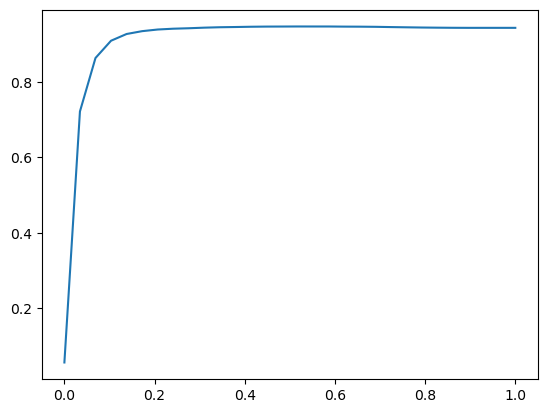

In [283]:
plt.plot(thresholds, scores)

In [286]:
from collections import Counter

In [288]:
Counter(y_pred >= 1.0)

Counter({False: 47526})

In [290]:
 y_val.mean() # 5,6% OF PATIENTS have heartattack from prediction

0.05620081639523629

In [292]:
1 - y_val.mean() # 94% OF PATIENTS  not having heart attack rom predicton

0.9437991836047637

## 4.3 Confusion table

* Different types of errors and correct decisions
* Arranging them in a table

In [295]:
actual_positive = (y_val == 1)
actual_negative = (y_val == 0)

In [296]:
t = 0.5
predict_positive = (y_pred >= t)
predict_negative = (y_pred < t)

In [299]:
tp = (predict_positive & actual_positive).sum()
tn = (predict_negative & actual_negative).sum()

fp = (predict_positive & actual_negative).sum()
fn = (predict_negative & actual_positive).sum()

In [300]:
confusion_matrix = np.array([
    [tn, fp],
    [fn, tp]
])
confusion_matrix

array([[44334,   521],
       [ 1988,   683]])

In [303]:
(confusion_matrix / confusion_matrix.sum()).round(2)

array([[0.93, 0.01],
       [0.04, 0.01]])

## 4.4 Precision 

In [306]:
p = tp / (tp + fp)
p  # % PATIENTS have heartattack from prediction

0.5672757475083057

##  Recall

In [309]:
r = tp / (tp + fn)
r  # % PATIENTS who have not  heartattack from prediction

0.2557094721078248

## 4.5 ROC Curves

### TPR and FRP

In [312]:
tpr = tp / (tp + fn)
tpr

0.2557094721078248

In [314]:
fpr = fp / (fp + tn)
fpr

0.011615204547987961

In [316]:
scores = []

thresholds = np.linspace(0, 1, 101)

for t in thresholds:
    actual_positive = (y_val == 1)
    actual_negative = (y_val == 0)
    
    predict_positive = (y_pred >= t)
    predict_negative = (y_pred < t)

    tp = (predict_positive & actual_positive).sum()
    tn = (predict_negative & actual_negative).sum()

    fp = (predict_positive & actual_negative).sum()
    fn = (predict_negative & actual_positive).sum()
    
    scores.append((t, tp, fp, fn, tn))

In [318]:
columns = ['threshold', 'tp', 'fp', 'fn', 'tn']
df_scores = pd.DataFrame(scores, columns=columns)

df_scores['tpr'] = df_scores.tp / (df_scores.tp + df_scores.fn)
df_scores['fpr'] = df_scores.fp / (df_scores.fp + df_scores.tn)

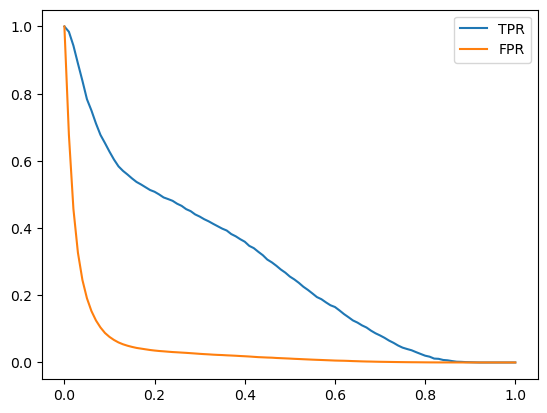

In [320]:
plt.plot(df_scores.threshold, df_scores['tpr'], label='TPR')
plt.plot(df_scores.threshold, df_scores['fpr'], label='FPR')
plt.legend()

### Random model

In [323]:
np.random.seed(1)
y_rand = np.random.uniform(0, 1, size=len(y_val))

In [325]:
((y_rand >= 0.5) == y_val).mean()

0.49785380633758364

In [327]:
def tpr_fpr_dataframe(y_val, y_pred):
    scores = []

    thresholds = np.linspace(0, 1, 101)

    for t in thresholds:
        actual_positive = (y_val == 1)
        actual_negative = (y_val == 0)

        predict_positive = (y_pred >= t)
        predict_negative = (y_pred < t)

        tp = (predict_positive & actual_positive).sum()
        tn = (predict_negative & actual_negative).sum()

        fp = (predict_positive & actual_negative).sum()
        fn = (predict_negative & actual_positive).sum()

        scores.append((t, tp, fp, fn, tn))

    columns = ['threshold', 'tp', 'fp', 'fn', 'tn']
    df_scores = pd.DataFrame(scores, columns=columns)

    df_scores['tpr'] = df_scores.tp / (df_scores.tp + df_scores.fn)
    df_scores['fpr'] = df_scores.fp / (df_scores.fp + df_scores.tn)
    
    return df_scores

In [329]:
df_rand = tpr_fpr_dataframe(y_val, y_rand)

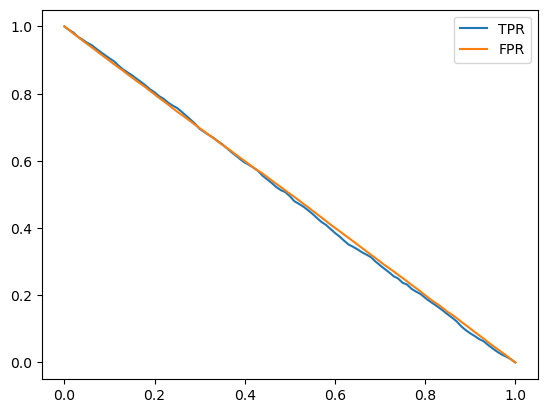

In [331]:
plt.plot(df_rand.threshold, df_rand['tpr'], label='TPR')
plt.plot(df_rand.threshold, df_rand['fpr'], label='FPR')
plt.legend()

### Ideal model

In [334]:
num_neg = (y_val == 0).sum()
num_pos = (y_val == 1).sum()
num_neg, num_pos

(44855, 2671)

In [336]:
y_ideal = np.repeat([0, 1], [num_neg, num_pos])
y_ideal

y_ideal_pred = np.linspace(0, 1, len(y_val))

In [338]:
1 - y_val.mean()

0.9437991836047637

In [340]:
accuracy_score(y_ideal, y_ideal_pred >= 0.726)

0.7822034254934142

In [342]:
df_ideal = tpr_fpr_dataframe(y_ideal, y_ideal_pred)
df_ideal[::10]

,threshold,tp,fp,fn,tn,tpr,fpr
0,0.0,2671,44855,0,0,1.000000,1.000000
10,0.1,2671,40102,0,4753,1.000000,0.894036
20,0.2,2671,35350,0,9505,1.000000,0.788095
30,0.3,2671,30597,0,14258,1.000000,0.682131
40,0.4,2671,25845,0,19010,1.000000,0.576190
50,0.5,2671,21092,0,23763,1.000000,0.470226
60,0.6,2671,16340,0,28515,1.000000,0.364285
70,0.7,2671,11587,0,33268,1.000000,0.258321
80,0.8,2671,6835,0,38020,1.000000,0.152380
90,0.9,2671,2082,0,42773,1.000000,0.046416


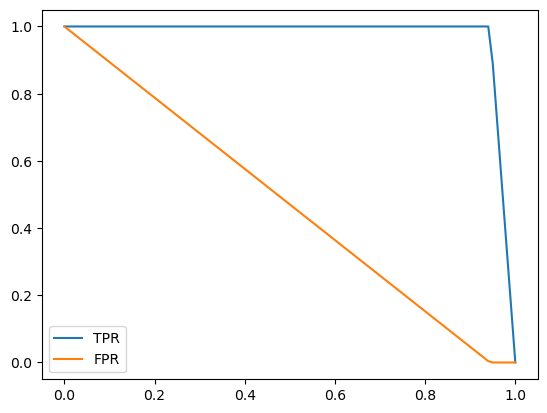

In [344]:
plt.plot(df_ideal.threshold, df_ideal['tpr'], label='TPR')
plt.plot(df_ideal.threshold, df_ideal['fpr'], label='FPR')
plt.legend()

### Putting everything together

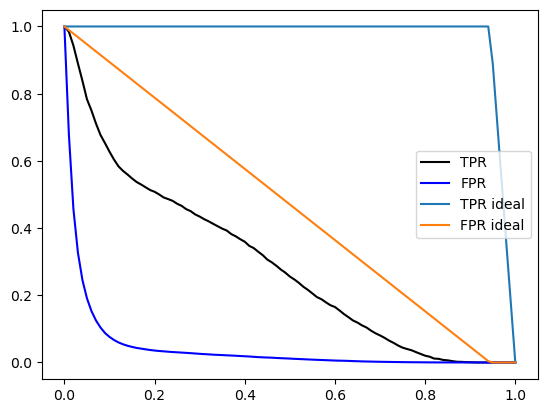

In [347]:
plt.plot(df_scores.threshold, df_scores['tpr'], label='TPR', color='black')
plt.plot(df_scores.threshold, df_scores['fpr'], label='FPR', color='blue')

plt.plot(df_ideal.threshold, df_ideal['tpr'], label='TPR ideal')
plt.plot(df_ideal.threshold, df_ideal['fpr'], label='FPR ideal')

# plt.plot(df_rand.threshold, df_rand['tpr'], label='TPR random', color='grey')
# plt.plot(df_rand.threshold, df_rand['fpr'], label='FPR random', color='grey')

plt.legend()

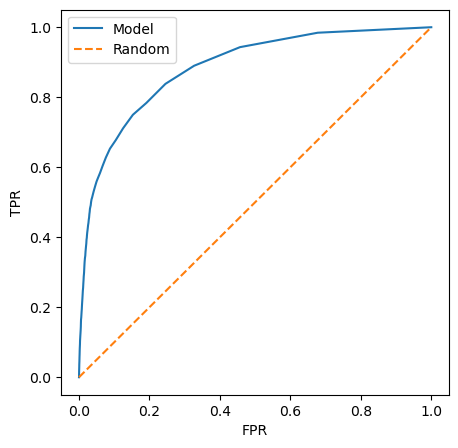

In [349]:
plt.figure(figsize=(5, 5))

plt.plot(df_scores.fpr, df_scores.tpr, label='Model')
plt.plot([0, 1], [0, 1], label='Random', linestyle='--')

plt.xlabel('FPR')
plt.ylabel('TPR')

plt.legend()

### roc_curve with  Scikit lezrn

In [357]:
from sklearn.metrics import roc_curve

In [358]:
fpr, tpr, thresholds = roc_curve(y_val, y_pred)

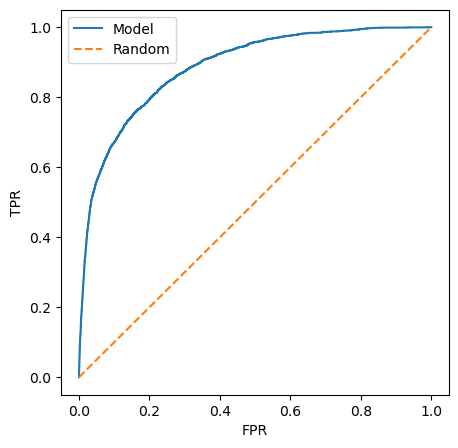

In [361]:
plt.figure(figsize=(5, 5))

plt.plot(fpr, tpr, label='Model')
plt.plot([0, 1], [0, 1], label='Random', linestyle='--')

plt.xlabel('FPR')
plt.ylabel('TPR')

plt.legend()

## ROC AUC

* Area under the ROC curve - useful metric
* Interpretation of AUC

In [364]:
from sklearn.metrics import auc

In [366]:
auc(fpr, tpr)

0.8860921006708208

In [368]:
auc(df_scores.fpr, df_scores.tpr)

0.8833135189427092

In [370]:
auc(df_ideal.fpr, df_ideal.tpr)

0.9997779191246506

In [372]:
fpr, tpr, thresholds = roc_curve(y_val, y_pred)
auc(fpr, tpr)

0.8860921006708208

In [374]:
from sklearn.metrics import roc_auc_score

In [376]:
roc_auc_score(y_val, y_pred)

0.8860921006708208

In [378]:
neg = y_pred[y_val == 0]
pos = y_pred[y_val == 1]

In [379]:
import random

In [382]:
n = 50000

np.random.seed(1)
pos_ind = np.random.randint(0, len(pos), size=n)
neg_ind = np.random.randint(0, len(neg), size=n)

(pos[pos_ind] > neg[neg_ind]).mean()

0.88728

In [384]:
n = 100000
success = 0 

for i in range(n):
    pos_ind = random.randint(0, len(pos) - 1)
    neg_ind = random.randint(0, len(neg) - 1)

    if pos[pos_ind] > neg[neg_ind]:
        success = success + 1

success / n

0.88639

## Cross-Validation

* Evaluating the same model on different subsets of data
* Getting the average prediction and the spread within predictions

In [387]:
def train(df_train, y_train, C=1.0):
    dicts = df_train[categorical + numerical].to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)

    model = LogisticRegression(C=C, max_iter=237630) 
    model.fit(X_train, y_train)
    
    return dv, model

In [389]:
dv, model = train(df_train, y_train, C=0.001)

In [390]:
def predict(df, dv, model):
    dicts = df[categorical + numerical].to_dict(orient='records')

    X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[:, 1]

    return y_pred

In [393]:
y_pred = predict(df_val, dv, model)

In [395]:
from sklearn.model_selection import KFold

In [397]:
from tqdm.auto import tqdm

In [399]:
n_splits = 3

for C in tqdm([0.001, 0.01, 0.1, 0.5, 1, 5, 10]):
    kfold = KFold(n_splits=n_splits, shuffle=True, random_state=1)

    scores = []

    for train_idx, val_idx in kfold.split(df_full_train):
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]

        y_train = df_train.hadheartattack.values
        y_val = df_val.hadheartattack.values

        dv, model = train(df_train, y_train, C=C)
        y_pred = predict(df_val, dv, model)

        auc = roc_auc_score(y_val, y_pred)
        scores.append(auc)

    print('C=%s %.3f +- %.3f' % (C, np.mean(scores), np.std(scores)))

  0%|          | 0/7 [00:00<?, ?it/s]

C=0.001 0.879 +- 0.002
C=0.01 0.886 +- 0.002
C=0.1 0.886 +- 0.002
C=0.5 0.885 +- 0.002
C=1 0.885 +- 0.002
C=5 0.885 +- 0.002
C=10 0.885 +- 0.002


In [400]:
scores

[0.8853670490465516, 0.8872093482706633, 0.8830403067686006]

In [403]:
np.mean(scores), np.std(scores)

(0.8852055680286052, 0.0017058299741080493)

In [405]:
print( '%.3f +-  %.3f' % (np.mean(scores), np.std(scores)) )

0.885 +-  0.002


In [409]:
dv, model = train(df_full_train, df_full_train.hadheartattack.values, C=1.0)
y_pred = predict(df_test, dv, model)

auc = roc_auc_score(y_test, y_pred)
auc

0.8866366399563267